In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
dataset = pd.read_csv('customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = dataset.iloc[:,[3,4]].values

In [12]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

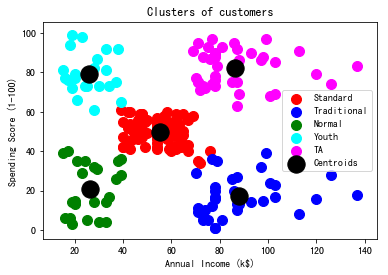

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Traditional')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Normal')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Youth')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'TA')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

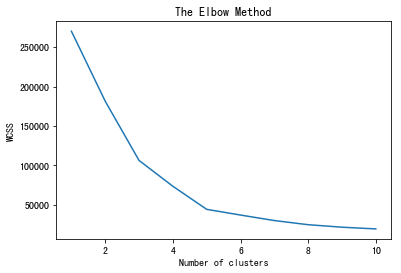

In [14]:
# 评估聚类个数
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11): #循环使用不同k测试结果
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia簇内误差平方和
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 加载数据
ageinc_df=pd.read_csv('ageinc.csv')
ageinc_df.info()
# 两列数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
income    1000 non-null int64
age       1000 non-null int64
dtypes: int64(2)
memory usage: 15.7 KB


In [28]:
ageinc_df.head()

,income,age
0,101743,58
1,49597,27
2,36517,52
3,33223,49
4,72994,53


In [29]:
ageinc_df.describe()

,income,age
count,1000.00000,1000.000000
mean,80116.81800,39.410000
std,39262.33567,10.976811
min,0.00000,18.000000
25%,46402.25000,30.000000
50%,78993.50000,39.000000
75%,114810.50000,49.000000
max,179294.00000,63.000000


In [30]:
# 对数据进行标准化
ageinc_df['z_income'] = (ageinc_df['income']-ageinc_df['income'].mean())/ageinc_df['income'].std()
ageinc_df['z_age'] = (ageinc_df['age']-ageinc_df['age'].mean())/ageinc_df['age'].std()
ageinc_df.describe()

,income,age,z_income,z_age
count,1000.00000,1000.000000,1.000000e+03,1.000000e+03
mean,80116.81800,39.410000,2.842171e-17,2.906009e-16
std,39262.33567,10.976811,1.000000e+00,1.000000e+00
min,0.00000,18.000000,-2.040552e+00,-1.950475e+00
25%,46402.25000,30.000000,-8.587000e-01,-8.572617e-01
50%,78993.50000,39.000000,-2.861058e-02,-3.735147e-02
75%,114810.50000,49.000000,8.836378e-01,8.736599e-01
max,179294.00000,63.000000,2.526013e+00,2.149076e+00


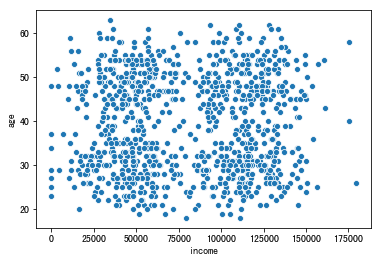

In [31]:
# 初步进行数据可视化
sns.scatterplot(x='income',y='age',data=ageinc_df)

In [32]:
from sklearn import cluster
model=cluster.KMeans(n_clusters=3,random_state=10)
model.fit(ageinc_df[['z_income','z_age']])
#为用户打上标签
ageinc_df['cluster']=model.labels_
#查看用户的分群情况
ageinc_df.head(50)

,income,age,z_income,z_age,cluster
0,101743,58,0.550812,1.693570,1
1,49597,27,-0.777331,-1.130565,0
2,36517,52,-1.110474,1.146963,1
3,33223,49,-1.194372,0.873660,1
4,72994,53,-0.181416,1.238064,1
5,38361,26,-1.063508,-1.221666,0
6,48579,29,-0.803259,-0.948363,0
7,115248,24,0.894781,-1.403869,2
8,11527,31,-1.746962,-0.766161,0
9,54096,51,-0.662742,1.055862,1


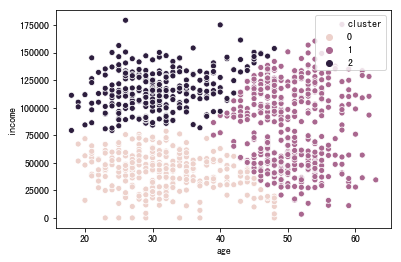

In [33]:
# 将分群结果可视化
sns.scatterplot(x='age',y='income',hue='cluster',data=ageinc_df)
#横轴为年龄，纵轴为收入，分类为用户分群标签

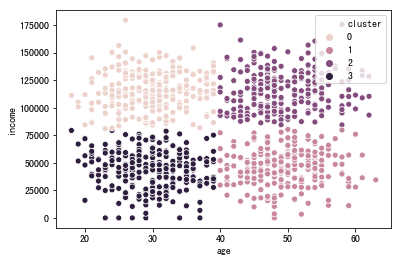

In [34]:
from sklearn import cluster
model=cluster.KMeans(n_clusters=4,random_state=10)
model.fit(ageinc_df[['z_income','z_age']])
#导入sklearn中的cluster
#将群体分成4层
#用标准化的收入与年龄来拟合模型
ageinc_df['cluster']=model.labels_
sns.scatterplot(x='age',y='income',hue='cluster',data=ageinc_df)
#横轴为年龄，纵轴为收入，分类为用户分群标签

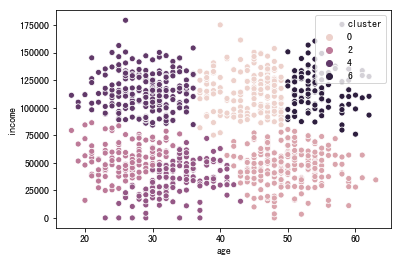

In [35]:
#将用户分为6层
from sklearn import cluster
model=cluster.KMeans(n_clusters=6,random_state=10)
model.fit(ageinc_df[['z_income','z_age']])
#导入sklearn中的cluster
#将群体分成6层
#用标准化的收入与年龄来拟合模型
ageinc_df['cluster']=model.labels_
sns.scatterplot(x='age',y='income',hue='cluster',data=ageinc_df)
#横轴为年龄，纵轴为收入，分类为用户分群标签

In [36]:
#使用groupby函数，将用户按照所在群分组，统计收入的数据
ageinc_df.groupby(['cluster'])['income'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,161.0,114971.826087,18540.964430,75097.0,98690.00,114709.0,126910.00,175073.0
1,238.0,46583.861345,16167.299094,0.0,36212.00,47546.5,57219.25,80243.0
2,127.0,54270.023622,13989.642212,15955.0,45021.00,53488.0,61943.50,86327.0
3,140.0,34758.514286,15865.711484,0.0,24043.00,34954.0,47318.75,72118.0
4,228.0,115865.456140,16417.067028,84184.0,104439.25,115291.0,128230.75,179294.0
5,106.0,116448.924528,18210.342609,75956.0,103291.00,115319.5,128014.75,175497.0


In [37]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4,random_state=30)
model.fit(ageinc_df[['z_age','z_income']])

ageinc_df['cluster'] = model.labels_
ageinc_df.groupby(['cluster'])['income'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,256.0,46482.371094,16357.141893,0.0,35781.75,47520.0,57161.75,80243.0
1,258.0,115210.709302,16802.768499,80820.0,104076.00,114943.5,127979.25,179294.0
2,248.0,43699.213710,17463.882999,0.0,31967.50,45212.5,56248.00,79360.0
3,238.0,116199.844538,18110.799585,84364.0,100752.25,115183.0,127515.25,175497.0


In [38]:
# 发现收入分为2档，一档0-8w，一档8-18w

In [39]:
ageinc_df.groupby(['cluster'])['age'].describe()
# 发现年龄分为2档，0和3为18岁-39岁中青年，1和2为40-60岁中老年

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,256.0,49.339844,4.784548,40.0,46.0,49.0,53.0,63.0
1,258.0,29.748062,4.674887,18.0,26.0,30.0,33.0,39.0
2,248.0,29.625000,4.857535,18.0,26.0,30.0,33.0,39.0
3,238.0,49.399160,5.142312,40.0,46.0,48.0,53.0,62.0


In [126]:
import pandas as pd
airbnb=pd.read_csv('airbnb.csv')
#查看数据类型
#变量类别：用户个人信息、用户与airbnb的关系、app使用语言、用户去的国家、用户下单渠道
#这里有2个日期变量，之后会进行操作
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67936 entries, 0 to 67935
Data columns (total 14 columns):
age                     67936 non-null int64
date_account_created    67936 non-null object
date_first_booking      67936 non-null object
gender                  67936 non-null object
Language_EN             67936 non-null int64
Language_ZH             67936 non-null int64
Country_US              67936 non-null int64
Country_EUR             67936 non-null int64
android                 67936 non-null int64
moweb                   67936 non-null int64
web                     67936 non-null int64
ios                     67936 non-null int64
Married                 67936 non-null int64
Children                67936 non-null int64
dtypes: int64(11), object(3)
memory usage: 7.3+ MB


In [127]:
airbnb.shape
# 分析完没有缺失值

(67936, 14)

In [128]:
airbnb.describe()

,age,Language_EN,Language_ZH,Country_US,Country_EUR,android,moweb,web,ios,Married,Children
count,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000
mean,47.874249,0.974476,0.005947,0.713907,0.159091,0.658355,0.340423,0.895828,0.067534,0.790155,1.536696
std,146.090906,0.157711,0.076886,0.451937,0.365764,0.474265,0.473855,0.305485,0.250947,0.407201,0.836273
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,33.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,42.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [129]:
airbnb.head()

,age,date_account_created,date_first_booking,gender,Language_EN,Language_ZH,Country_US,Country_EUR,android,moweb,web,ios,Married,Children
0,56,9/28/2010,8/2/2010,F,1,0,1,0,1,0,1,0,1,1
1,42,12/5/2011,9/8/2012,F,1,0,0,0,0,1,1,0,0,1
2,41,9/14/2010,2/18/2010,U,1,0,1,0,1,0,1,0,0,2
3,46,1/2/2010,1/5/2010,F,1,0,1,0,1,0,1,0,0,2
4,47,1/3/2010,1/13/2010,F,1,0,1,0,1,0,1,0,1,3


In [130]:
# 发现年龄有异常值
aribnb = airbnb[airbnb['age']<=70]
airbnb = airbnb[airbnb['age']>=18]

In [131]:
#将注册日期转变为日期时间格式
airbnb['date_account_created']=pd.to_datetime(airbnb['date_account_created'])
airbnb.info()
# data_account_created变量格式从object转变为datetime64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67914 entries, 0 to 67935
Data columns (total 14 columns):
age                     67914 non-null int64
date_account_created    67914 non-null datetime64[ns]
date_first_booking      67914 non-null object
gender                  67914 non-null object
Language_EN             67914 non-null int64
Language_ZH             67914 non-null int64
Country_US              67914 non-null int64
Country_EUR             67914 non-null int64
android                 67914 non-null int64
moweb                   67914 non-null int64
web                     67914 non-null int64
ios                     67914 non-null int64
Married                 67914 non-null int64
Children                67914 non-null int64
dtypes: datetime64[ns](1), int64(11), object(2)
memory usage: 7.8+ MB


In [132]:
#将年份从中提取出来，将2019-注册日期的年份，并生成一个新的变量year_since_account_created
airbnb['year_since_account_created']=airbnb['date_account_created'].apply(lambda x:2019-x.year)
#计算注册至今（2019年）有几年
airbnb.year_since_account_created.describe()

count    67914.000000
mean         6.035898
std          0.965047
min          5.000000
25%          5.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: year_since_account_created, dtype: float64

In [133]:
airbnb['date_first_booking']=pd.to_datetime(airbnb['date_first_booking'])
airbnb['year_since_first_booking']=airbnb['date_first_booking'].apply(lambda x:2019-x.year)
airbnb.year_since_first_booking.describe()

count    67914.000000
mean         5.907942
std          0.994814
min          4.000000
25%          5.000000
50%          6.000000
75%          6.000000
max          9.000000
Name: year_since_first_booking, dtype: float64

In [135]:
airbnb.year_since_first_booking.describe()

count    67914.000000
mean         5.907942
std          0.994814
min          4.000000
25%          5.000000
50%          6.000000
75%          6.000000
max          9.000000
Name: year_since_first_booking, dtype: float64

In [136]:
airbnb.head()

,age,date_account_created,date_first_booking,gender,Language_EN,Language_ZH,Country_US,Country_EUR,android,moweb,web,ios,Married,Children,year_since_account_created,year_since_first_booking
0,56,2010-09-28,2010-08-02,F,1,0,1,0,1,0,1,0,1,1,9,9
1,42,2011-12-05,2012-09-08,F,1,0,0,0,0,1,1,0,0,1,8,7
2,41,2010-09-14,2010-02-18,U,1,0,1,0,1,0,1,0,0,2,9,9
3,46,2010-01-02,2010-01-05,F,1,0,1,0,1,0,1,0,0,2,9,9
4,47,2010-01-03,2010-01-13,F,1,0,1,0,1,0,1,0,1,3,9,9


In [137]:
# 将类别型型转化成哑变量(gender)
airbnb = pd.get_dummies(airbnb)
airbnb.head()

,age,date_account_created,date_first_booking,Language_EN,Language_ZH,Country_US,Country_EUR,android,moweb,web,ios,Married,Children,year_since_account_created,year_since_first_booking,gender_F,gender_M,gender_U
0,56,2010-09-28,2010-08-02,1,0,1,0,1,0,1,0,1,1,9,9,1,0,0
1,42,2011-12-05,2012-09-08,1,0,0,0,0,1,1,0,0,1,8,7,1,0,0
2,41,2010-09-14,2010-02-18,1,0,1,0,1,0,1,0,0,2,9,9,0,0,1
3,46,2010-01-02,2010-01-05,1,0,1,0,1,0,1,0,0,2,9,9,1,0,0
4,47,2010-01-03,2010-01-13,1,0,1,0,1,0,1,0,1,3,9,9,1,0,0


In [138]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67914 entries, 0 to 67935
Data columns (total 18 columns):
age                           67914 non-null int64
date_account_created          67914 non-null datetime64[ns]
date_first_booking            67914 non-null datetime64[ns]
Language_EN                   67914 non-null int64
Language_ZH                   67914 non-null int64
Country_US                    67914 non-null int64
Country_EUR                   67914 non-null int64
android                       67914 non-null int64
moweb                         67914 non-null int64
web                           67914 non-null int64
ios                           67914 non-null int64
Married                       67914 non-null int64
Children                      67914 non-null int64
year_since_account_created    67914 non-null int64
year_since_first_booking      67914 non-null int64
gender_F                      67914 non-null uint8
gender_M                      67914 non-null uint8
gender

In [139]:
# 删除两个日期变量，可以根据数据格式来进行drop
airbnb.drop(airbnb.select_dtypes(['datetime64']),inplace=True,axis=1)

In [140]:
airbnb_5=airbnb[['age','web','moweb','ios','android']]

In [141]:
#数据标准化，使用sklearn中预处理的scale
# 可以看出，preprocessing.scale()是按照列进行标准化计算，计算公式为

# (X_train[:,0]-X_train[:,0].mean())/X_train[:,0].std()
# (X_train[:,0]-np.mean(X_train[:,0]))/np.std(X_train[:,0])//或者

from sklearn.preprocessing import scale
x=pd.DataFrame(scale(airbnb_5))
# x=pd.DataFrame(scale(airbnb_5))
# print(result)

In [142]:
from sklearn import cluster
# 先尝试分为3类
model = cluster.KMeans(n_clusters=3,random_state=10)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [143]:
airbnb_5['cluster'] = model.labels_

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
airbnb_5.head()

,age,web,moweb,ios,android,cluster
0,56,1,0,0,1,1
1,42,1,1,0,0,2
2,41,1,0,0,1,1
3,46,1,0,0,1,1
4,47,1,0,0,1,1


In [145]:
# 模型评估与优化，评估各个变量的分群效果
airbnb_5.groupby(['cluster'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4588.0,38.064516,93.024205,18.0,27.0,31.0,37.0,2014.0
1,42070.0,52.763014,169.103141,18.0,29.0,34.0,44.0,2014.0
2,21256.0,40.356558,98.095178,18.0,28.0,33.0,40.0,2014.0


In [146]:
airbnb_5.groupby(['cluster'])['ios'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4588.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,42070.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21256.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
# 使用silhouette score，评估模型效果

In [148]:
from sklearn import metrics #调用sklearn的metrics库
# model.fit_predic(x) 判断个体与群体的距离
x_cluster=model.fit_predict(x)#个体与群的距离
score=metrics.silhouette_score(x,x_cluster)#评分越高，个体与群越近；评分越低，个体与群越远
print(score)

0.8629261824439511


In [149]:
centers=pd.DataFrame(model.cluster_centers_)
centers.to_csv('center_3.csv')
#将群体分为5组
model=cluster.KMeans(n_clusters=4,random_state=10)
model.fit(x)
centers=pd.DataFrame(model.cluster_centers_)
centers.to_csv('center_5.csv')

In [154]:
error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=10)
    kmeans.fit(x)
    error.append(kmeans.inertia_)

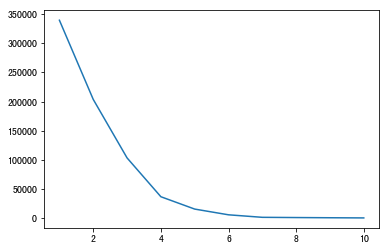

In [155]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)

In [156]:
# 查看中心点数据
centers = pd.DataFrame(model.cluster_centers_,columns=['age','web','moweb','ios','android'])

In [157]:
centers

,age,web,moweb,ios,android
0,-0.064828,0.341068,-0.718264,-0.269166,0.720220
1,-0.096766,-2.931968,0.137834,3.715175,-0.135137
2,-0.083968,0.341068,1.392245,-0.269166,-1.388464
3,13.432709,0.102868,-0.422452,-0.161772,0.424663
4,-0.091652,-2.931968,-0.115506,-0.269166,0.047181


## 回归分析

- P&G销售额预测分析

- P&G 快消企业，分析目的
    - 对商超门店的销售额进行预测
    - 量化自身所能控制的各种促销因素所能产生的效果
    - 对营销资源做出合理规划
- P&G传统快消企业，数据特点
    - 聚合类的数据
    - 渠道众多，无法精准了解用户

In [159]:
import pandas as pd
#数据读取#
#index_col=0 ，数据的第一列是索引，指定索引列
store=pd.read_csv('store_rev.csv',index_col=0)

In [160]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 845 to 26
Data columns (total 7 columns):
revenue     985 non-null float64
reach       985 non-null int64
local_tv    929 non-null float64
online      985 non-null int64
instore     985 non-null int64
person      985 non-null int64
event       985 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 61.6+ KB


In [161]:
store.describe()

,revenue,reach,local_tv,online,instore,person
count,985.000000,985.000000,929.000000,985.000000,985.000000,985.000000
mean,38357.355025,3.395939,31324.061109,1596.527919,3350.962437,11.053807
std,11675.603883,1.011913,3970.934733,496.131586,976.546381,3.041740
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30223.600000,3.000000,28733.830000,1253.000000,2690.000000,9.000000
50%,38159.110000,3.000000,31104.520000,1607.000000,3351.000000,11.000000
75%,45826.520000,4.000000,33972.410000,1921.000000,4011.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


In [185]:
store.shape

(985, 10)

In [163]:
store.head()

,revenue,reach,local_tv,online,instore,person,event
845,45860.28,2,31694.91,2115,3296,8,non_event
483,63588.23,2,35040.17,1826,2501,14,special
513,23272.69,4,30992.82,1851,2524,6,special
599,45911.23,2,29417.78,2437,3049,12,special
120,36644.23,2,35611.11,1122,1142,13,cobranding


In [165]:
store['local_tv'].head()

845    31694.91
483    35040.17
513    30992.82
599    29417.78
120    35611.11
Name: local_tv, dtype: float64

In [167]:
store['event'].head()

845     non_event
483       special
513       special
599       special
120    cobranding
Name: event, dtype: object

In [169]:
# 确定event的具体的值
store.event.unique()

array(['non_event', 'special', 'cobranding', 'holiday'], dtype=object)

In [170]:
#这些类别对应的revenue(销售额)是怎样的
store.groupby(['event'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,398.0,38277.664497,11879.097324,7146.99,30472.1525,37864.155,46333.5600,79342.07
holiday,103.0,37791.890583,11942.369136,5000.00,29644.5250,38432.780,46036.1300,73377.15
non_event,192.0,37903.081562,11186.436740,6874.43,29852.3775,37937.175,44611.6375,69429.39
special,292.0,38964.136438,11648.616882,10207.96,30325.8125,39197.870,45897.0400,71757.50


In [171]:
store.groupby(['event'])['local_tv'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,376.0,31424.590186,3951.049566,21252.35,28746.9725,31336.570,33839.0200,42162.64
holiday,96.0,30860.524896,4448.719364,21792.84,27769.6000,30564.705,33595.5975,41047.01
non_event,182.0,31415.197527,3952.155383,20000.00,29222.5875,31238.235,34386.0825,42069.84
special,275.0,31288.110982,3842.412128,21428.20,28668.7100,30921.790,34105.6250,43676.90


In [172]:
# 将类别变量转换为哑变量
store=pd.get_dummies(store)

In [173]:
store.head()

,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
845,45860.28,2,31694.91,2115,3296,8,0,0,1,0
483,63588.23,2,35040.17,1826,2501,14,0,0,0,1
513,23272.69,4,30992.82,1851,2524,6,0,0,0,1
599,45911.23,2,29417.78,2437,3049,12,0,0,0,1
120,36644.23,2,35611.11,1122,1142,13,1,0,0,0


In [174]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 845 to 26
Data columns (total 10 columns):
revenue             985 non-null float64
reach               985 non-null int64
local_tv            929 non-null float64
online              985 non-null int64
instore             985 non-null int64
person              985 non-null int64
event_cobranding    985 non-null uint8
event_holiday       985 non-null uint8
event_non_event     985 non-null uint8
event_special       985 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 57.7 KB


In [181]:
# 相关性分析
store.corr()

,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
revenue,1.000000,-0.155314,0.602114,0.171227,0.311739,0.559208,-0.005623,-0.016559,-0.019155,0.033752
reach,-0.155314,1.000000,-0.034039,-0.025141,0.035635,0.061417,0.043809,0.020398,-0.043128,-0.023330
local_tv,0.602114,-0.034039,1.000000,0.006775,-0.046825,0.048664,0.020886,-0.039650,0.011335,-0.005874
online,0.171227,-0.025141,0.006775,1.000000,-0.026399,0.036662,-0.024646,-0.018596,-0.020587,0.056799
instore,0.311739,0.035635,-0.046825,-0.026399,1.000000,-0.007482,-0.057725,0.045963,0.015495,0.017788
person,0.559208,0.061417,0.048664,0.036662,-0.007482,1.000000,0.002439,-0.025692,-0.025568,0.036771
event_cobranding,-0.005623,0.043809,0.020886,-0.024646,-0.057725,0.002439,1.000000,-0.281389,-0.405169,-0.534499
event_holiday,-0.016559,0.020398,-0.039650,-0.018596,0.045963,-0.025692,-0.281389,1.000000,-0.168151,-0.221824
event_non_event,-0.019155,-0.043128,0.011335,-0.020587,0.015495,-0.025568,-0.405169,-0.168151,1.000000,-0.319403
event_special,0.033752,-0.023330,-0.005874,0.056799,0.017788,0.036771,-0.534499,-0.221824,-0.319403,1.000000


In [184]:
# 判断相关性大小
store.corr()[['revenue']].sort_values('revenue',ascending=False)

,revenue
revenue,1.000000
local_tv,0.602114
person,0.559208
instore,0.311739
online,0.171227
event_special,0.033752
event_cobranding,-0.005623
event_holiday,-0.016559
event_non_event,-0.019155
reach,-0.155314


In [189]:
store.head()

,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
845,45860.28,2,31694.91,2115,3296,8,0,0,1,0
483,63588.23,2,35040.17,1826,2501,14,0,0,0,1
513,23272.69,4,30992.82,1851,2524,6,0,0,0,1
599,45911.23,2,29417.78,2437,3049,12,0,0,0,1
120,36644.23,2,35611.11,1122,1142,13,1,0,0,0


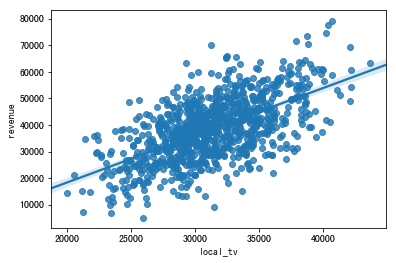

In [187]:
# 可视化分析
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#线性关系可视化
#斜率与相关系数有关
sns.regplot('local_tv','revenue',store)

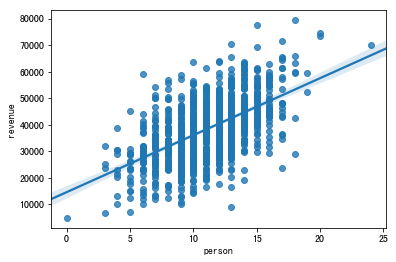

In [190]:
#线性关系可视化
sns.regplot('person','revenue',store)

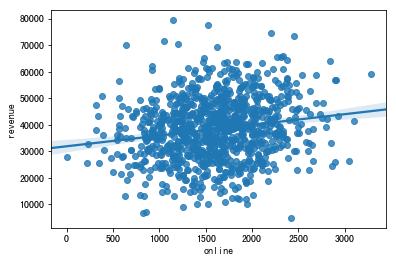

In [191]:
sns.regplot('online','revenue',store)

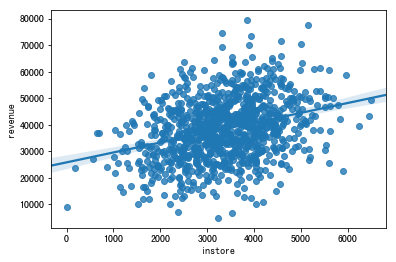

In [192]:
sns.regplot('instore','revenue',store)

In [198]:
# 填充缺失值
store.fillna(store.local_tv.mean(),inplace=True)

In [199]:
# 线性回归分析
from sklearn.linear_model import LinearRegression
model=LinearRegression()

#设定自变量和因变量
y=store['revenue']
#第一次三个 
# x=store[['local_tv','person','instore']]
#第二次四个 
x=store[['local_tv','person','instore','online']]
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [200]:
# 自变量系数
model.coef_

array([1.74975212e+00, 2.02868682e+03, 4.13909283e+00, 3.69796299e+00])

In [201]:
# 模型截距
model.intercept_

-58650.54568919278

In [202]:
model.score(x,y)

0.7703955973368736

In [203]:
y_pre = model.predict(x)

In [205]:
error = y_pre-y
error

845   -11359.453617
483   -15421.197060
513     1770.637395
599    -7111.681239
120     2264.726500
867    -6003.935563
847    -3193.253167
950     2171.374671
942    -6219.135573
550     3709.537179
975     -207.807927
674    -1797.608734
321    -9504.680065
915    -2198.413553
83     -9282.740584
346     2527.872611
51     -1176.255579
498     6857.051810
997     7052.025991
565     4564.236517
219     3547.407073
286    -1244.570792
618   -10611.755596
553     5004.779398
11      5561.848662
100   -11504.914844
870    -2515.079300
567      -29.133304
47     -1721.952445
299    -4851.003438
           ...     
34     -1221.877406
432    12320.257826
987    -1206.508015
905    13666.771235
142    -1039.595791
265     3237.415005
564    -2489.812810
614    -4216.446635
852      964.153824
818     2951.486781
421     2313.177382
733     1723.545329
384     6386.522285
137     6343.097610
560    -2921.091264
825      585.159082
600     9348.276789
715    -6248.917569
765   -10678.940393


In [207]:
# 计算均方根误差，标准误差
rmse=(error**2).mean()**.5#计算rmse
# MSE（Mean Square Error）均方误差
mae=abs(error).mean()#计算mae

print(rmse)
print(mae)

5591.764749668994
4485.5063831108655


# 分类分析

In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [209]:
churn=pd.read_csv('churn.csv')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
Churn                7043 non-null object
gender               7043 non-null object
Partner_att          7043 non-null int64
Dependents_att       7043 non-null int64
landline             7043 non-null int64
internet_att         7043 non-null int64
internet_other       7043 non-null int64
StreamingTV          7043 non-null int64
StreamingMovies      7043 non-null int64
Contract_Month       7043 non-null int64
Contract_1YR         7043 non-null int64
PaymentBank          7043 non-null int64
PaymentCreditcard    7043 non-null int64
PaymentElectronic    7043 non-null int64
MonthlyCharges       7043 non-null float64
TotalCharges         7043 non-null float64
dtypes: float64(2), int64(12), object(2)
memory usage: 880.5+ KB


In [210]:
churn.describe()

,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.483033,0.299588,0.903166,0.343746,0.439585,0.384353,0.387903,0.550192,0.209144,0.219225,0.216101,0.335794,64.761692,2275.929881
std,0.499748,0.458110,0.295752,0.474991,0.496372,0.486477,0.487307,0.497510,0.406726,0.413751,0.411613,0.472301,30.090047,2266.920469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,392.575000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,70.350000,1389.850000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,89.850000,3778.525000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


In [211]:
churn.head()

,Churn,gender,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges
0,No,Female,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85
1,No,Male,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50
2,Yes,Male,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15
3,No,Male,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75
4,Yes,Female,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65


In [212]:
# 查看是否有缺失值
import numpy as np
np.any(pd.isnull(churn))

False

In [213]:
# one-hot编码
churn=pd.get_dummies(churn)
churn.head()

,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes,gender_Female,gender_Male
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,1,0,1,0
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,1,0,0,1
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,0,1,0,1
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,1,0,0,1
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,0,1,1,0


In [214]:
#数据整理，将churn_yes保留，将female保留,drop不需要的数据
churn.drop(['Churn_No','gender_Male'],axis=1,inplace=True)
#变量大小写不规则，统一变成小写
churn.columns=churn.columns.str.lower()
churn.head()

,partner_att,dependents_att,landline,internet_att,internet_other,streamingtv,streamingmovies,contract_month,contract_1yr,paymentbank,paymentcreditcard,paymentelectronic,monthlycharges,totalcharges,churn_yes,gender_female
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,0,1
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,0,0
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,1,0
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,0,0
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,1,1


In [215]:
#将churn_yes重命名，方便后续的变量编写
churn=churn.rename(columns={'churn_yes':'flag'})
#二分类模型，分析flag 1和0的占比
churn.flag.value_counts()

0    5174
1    1869
Name: flag, dtype: int64

In [216]:
churn.flag.value_counts(1)

0    0.73463
1    0.26537
Name: flag, dtype: float64

In [217]:
summary=churn.groupby('flag')
summary.mean()

,partner_att,dependents_att,landline,internet_att,internet_other,streamingtv,streamingmovies,contract_month,contract_1yr,paymentbank,paymentcreditcard,paymentelectronic,monthlycharges,totalcharges,gender_female
flag,,,,,,,,,,,,,,,
0,0.528218,0.344801,0.901044,0.379204,0.347700,0.365868,0.369927,0.429068,0.252609,0.248550,0.249324,0.250097,61.265124,2545.918081,0.492656
1,0.357945,0.174425,0.909042,0.245586,0.693954,0.435527,0.437667,0.885500,0.088818,0.138042,0.124131,0.573034,74.441332,1528.514714,0.502408


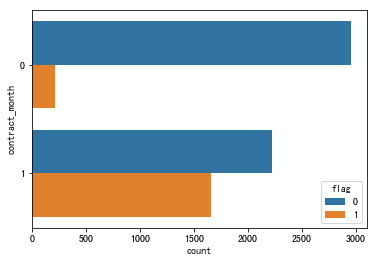

In [218]:
sns.countplot(y='contract_month',hue='flag',data=churn)

In [220]:
# 围绕flag变量，分析其他变量与flag的相关关系
churn.corr()[['flag']].sort_values('flag',ascending=False)

,flag
flag,1.000000
contract_month,0.405103
internet_other,0.308020
paymentelectronic,0.301919
monthlycharges,0.193356
streamingtv,0.063228
streamingmovies,0.061382
landline,0.011942
gender_female,0.008612
paymentbank,-0.117937


In [223]:
# 逻辑回归模型
#设定因变量与自变量， y 是 flag, x 根据刚才的相关分析挑选contract_month,internet_other与streamingtv
#自变量可以分为几类，partner/dependents,internet,streaming，contract,payment,charges，后续大家可以自己挑选进行建模
y=churn['flag']
x=churn[['contract_month','internet_other','streamingtv']]
#模型优化，streamingtv调整为paymentelectronic
y=churn['flag']
x=churn[['contract_month','internet_other','paymentelectronic']]
#调用sklearn模块，随机抽取训练集与测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
#模型优化，测试集与训练集对半分,第三次也跑这里
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=100)
#使用sklearn
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [226]:
lr.intercept_

array([-3.18961458])

In [225]:
lr.coef_

array([[1.99091042, 1.04180272, 0.63926566]])

In [229]:

# TPR = TP / (TP + FN)
# 所有真实类别为1的样本中，预测类别为1的比例
# FPR  = FP / (FP + TN)
# 所有真实类别为0的样本中，预测类别为1的比例
# 2.2 ROC曲线

# ROC曲线
# ROC曲线的横轴就是FPRate，纵轴就是TPRate，当二者相等时，表示的意义则是：
# 对于不论真实类别是1还是0的样本，分类器预测为1的概率是相等的，此时AUC为0.5

y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)
import sklearn.metrics as metrics
print("准确率为",metrics.accuracy_score(y_train,y_pred_train))
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(y_train,y_pred_train)
roc_auc=auc(fpr,tpr)
print(roc_auc)

准确率为 0.7776876267748478
0.6669635362478181


In [2]:
# 商品交叉销售分析
# 导入库
import pandas as pd
import apriori
#加载数据文件
data = pd.read_csv('order_table.csv')
# 转换为关联所用的记录模式
order_ids = pd.unique(data['order_id'])
order_records = [data[data['order_id']==each_id]['product_name'].tolist() for each_id in order_ids]
# 通过调用自定义的apriori做关联分析
minS = 0.1  # 定义最小支持度阀值
minC = 0.5  # 定义最小置信度阀值
L, suppData = apriori.apriori(order_records, minSupport=minS)  # 计算得到满足最小支持度的规则
rules = apriori.generateRules(order_records, L, suppData, minConf=minC)  # 计算满足最小置信度的规则
# 关联结果报表评估
model_summary = 'data record: {1} \nassociation rules count: {0}'  # 展示数据集记录数和满足阀值定义的规则数量
print(model_summary.format(len(rules), len(order_records)),'\n','-'*60)  # 使用str.format做格式化输出
rules_all = pd.DataFrame(rules, columns=['item1', 'item2', 'instance', 'support', 'confidence',
                                  'lift'])  # 创建频繁规则数据框
rules_sort = rules_all.sort_values(['lift'],ascending=False)
rules_sort.head(10)

data record: 2240 
association rules count: 0 
 ------------------------------------------------------------


,item1,item2,instance,support,confidence,lift


## 异常检测分析

In [4]:
# 导入库
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import IsolationForest
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 导入3D样式库
# 数据准备
raw_data = pd.read_csv('outlier.txt',sep=',')  # 读取数据
raw_data.shape


(10492, 47)

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10492 entries, 0 to 10491
Data columns (total 47 columns):
clientId                                10492 non-null float64
visitNumber                             10492 non-null int64
bounces                                 0 non-null float64
hits                                    10492 non-null int64
newVisits                               5800 non-null float64
pageviews                               10489 non-null float64
sessionQualityDim                       10492 non-null int64
visits                                  10492 non-null float64
adContent                               10492 non-null object
isVideoAd                               122 non-null object
campaign                                10492 non-null object
isTrueDirect                            5327 non-null object
keyword                                 10492 non-null object
medium                                  10492 non-null object
referralPath                 

In [5]:
#(10492, 47)
# 去除全部为空的特征
data_dropna = raw_data.dropna(axis='columns',how='all')
data_dropna = data_dropna.drop(['clientId'],axis=1)
data_dropna.shape

(10492, 44)

In [6]:
#(10492, 44)
# 填充NA列
# 找到NA列
cols_is_na = data_dropna.isnull().any()
na_cols = [cols_is_na.index[ind]
           for ind, na_result in enumerate(cols_is_na) if na_result == True]
print(data_dropna[na_cols].dtypes)
# 填充NA列
print(data_dropna[na_cols].head())
#print(type(data_dropna[na_cols].iloc[2,3]))
fill_rules = {'newVisits': 0, 'pageviews': 0, 'isVideoAd': False, 'isTrueDirect': False}
data_fillna = data_dropna.fillna(fill_rules)
print(data_fillna.isnull().any().sum())

newVisits       float64
pageviews       float64
isVideoAd        object
isTrueDirect     object
dtype: object
   newVisits  pageviews isVideoAd isTrueDirect
0        1.0       11.0       NaN          NaN
1        NaN        9.0       NaN          NaN
2        NaN       11.0       NaN         True
3        NaN       10.0       NaN          NaN
4        NaN        6.0       NaN         True
0


In [8]:
# 拆分数值特征和字符串特征
str_or_num = (data_fillna.dtypes=='object')
str_cols = [str_or_num.index[ind]
           for ind, na_result in enumerate(str_or_num) if na_result == True]
string_data = data_fillna[str_cols]
num_data = data_fillna[[i for i in str_or_num.index if i not in str_cols]]
# 分类特征转换为数值型索引
model_oe = OrdinalEncoder()
string_data_con = model_oe.fit_transform(string_data)
string_data_pd = pd.DataFrame(string_data_con,columns=string_data.columns)
# 合并原数值型特征和onehotencode后的特征
feature_merge = pd.concat((num_data,string_data_pd),axis=1)
# 异常点检测
model_isof = IsolationForest(n_estimators=20, n_jobs=1)
outlier_label = model_isof.fit_predict(feature_merge)
# 异常结果汇总
outlier_pd = pd.DataFrame(outlier_label,columns=['outlier_label'])
data_merge = pd.concat((data_fillna,outlier_pd),axis=1)
outlier_count = data_merge.groupby(['outlier_label'])['visitNumber'].count()
print('outliers: {0}/{1}'.format(outlier_count.iloc[0], data_merge.shape[0]))  # 输出异常的结果数量

#outliers: 1050/10492

# 统计每个渠道的异常情况
def cal_sample(df):
    data_count = df.groupby(['source'],as_index=False)['outlier_label'].count()
    return data_count.sort_values(['outlier_label'],ascending=False)

# 取出异常样本
outlier_source = data_merge[data_merge['outlier_label']==-1]
outlier_source_sort = cal_sample(outlier_source)
# 取出正常样本
normal_source = data_merge[data_merge['outlier_label']==1]
normal_source_sort = cal_sample(normal_source)
# 合并总样本
source_merge = pd.merge(outlier_source_sort,normal_source_sort,on='source',how='outer')
source_merge = source_merge.rename(index=str, columns={'outlier_label_x':'outlier_count','outlier_label_y':'normal_count'})
source_merge=source_merge.fillna(0)
# 计算异常比例
source_merge['total_count'] = source_merge['outlier_count']+source_merge['normal_count']
source_merge['outlier_rate'] = source_merge['outlier_count']/(source_merge['total_count'])
print(source_merge.sort_values(['total_count'],ascending=False).head())

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


outliers: 1050/10492
       source  outlier_count  normal_count  total_count  outlier_rate
0      google          374.0        4106.0       4480.0      0.083482
1    (direct)          241.0        2767.0       3008.0      0.080120
5    webgains           43.0         590.0        633.0      0.067930
3  shareasale           57.0         422.0        479.0      0.118998
4   linkshare           51.0         370.0        421.0      0.121140


Text(0.5,0.92,'outlier point distribution')

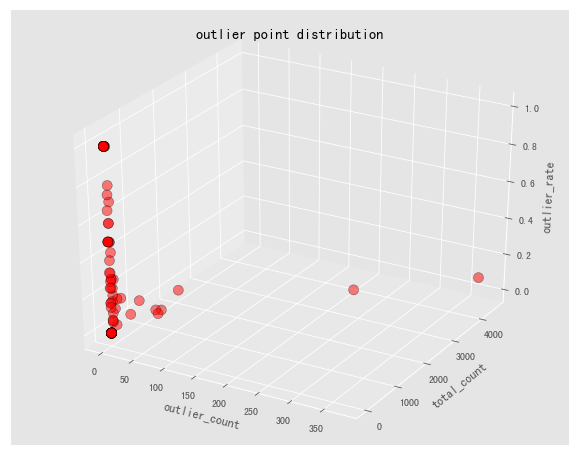

In [9]:
# 异常点图形展示
plt.style.use('ggplot')  # 使用ggplot样式库
fig = plt.figure(figsize=(10, 8))  # 创建画布对象
# 画图
ax = fig.add_subplot(111, projection='3d')
ax.scatter(source_merge['outlier_count'], source_merge['total_count'], source_merge['outlier_rate'],
           s=100, edgecolors='k', c='r', marker='o',alpha=0.5) 
ax.set_xlabel('outlier_count')
ax.set_ylabel('total_count')
ax.set_zlabel('outlier_rate')
plt.title('outlier point distribution')  # 设置图像标题

数据 113
分析 48
功能 47
Adobe 45
Analytics 37


(-0.5, 509.5, 516.5, -0.5)

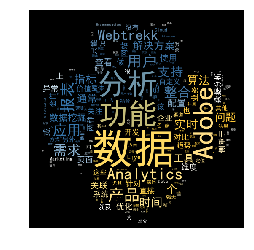

In [14]:
# 案例1 词频统计
# 导入库
import re  # 正则表达式库
import collections  # 词频统计库
import numpy as np  # numpy库
import jieba  # 结巴分词
import wordcloud  # 词云展示库
from PIL import Image  # 图像处理库
import matplotlib.pyplot as plt  # 图像展示库
# 读取文本文件
with open('article1.txt') as fn:
    string_data = fn.read()  # 使用read方法读取整段文本
# 文本预处理
pattern = re.compile(u'\t|\n|\.|-|一|:|;|\)|\(|\?|"')  # 建立正则表达式匹配模式
string_data = re.sub(pattern, '', string_data)  # 将符合模式的字符串替换掉
# 文本分词
seg_list_exact = jieba.cut(string_data, cut_all=False)  # 精确模式分词[默认模式]
remove_words = ['的', '，', '和', '是', '随着', '对于', ' ', '对', '等', '能', '都', '。', '、', '中', '与', '在', '其', '了', '可以', '进行', '有', '更', '需要', '提供', '多', '能力', '通过', '会', '不同', '一个', '这个', '我们', '将', '并', '同时', '看', '如果', '但', '到', '非常', '—', '如何', '包括', '这']  # 自定义去除词库
# remove_words = [] #空去除词列表，用于跟关键字提取做效果对比
object_list = [i for i in seg_list_exact if i not in remove_words] # 将不在去除词列表中的词添加到列表中
# 词频统计
word_counts = collections.Counter(object_list)  # 对分词做词频统计
word_counts_top5 = word_counts.most_common(5)  # 获取前10个频率最高的词
for w, c in word_counts_top5:  # 分别读出每条词和出现从次数
    print(w, c)  # 打印输出
# 词频展示
mask = np.array(Image.open('wordcloud.jpg'))  # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf',  # 设置字体格式，不设置将无法显示中文
    mask=mask,  # 设置背景图
    max_words=200,  # 设置最大显示的词数
    max_font_size=100,  # 设置字体最大值

)
wc.generate_from_frequencies(word_counts)  # 从字典生成词云
image_colors = wordcloud.ImageColorGenerator(mask)  # 从背景图建立颜色方案
wc.recolor(color_func=image_colors)  # 将词云颜色设置为背景图方案
plt.imshow(wc)  # 显示词云
plt.axis('off')  # 关闭坐标轴

## 词性标注

In [15]:
# 导入库
import jieba.posseg as pseg
import pandas as pd
with open('article1.txt') as fn:
    string_data = fn.read()  # 使用read方法读取整段文本
# 分词+词性标注
words = pseg.cut(string_data)  # 分词
words_pd = pd.DataFrame(words, columns=['word', 'type'])  # 创建结果数据框
print(words_pd.head(4))  # 展示结果前4条

'''
        word type
0      Adobe  eng
1               x
2  Analytics  eng
3          和    c

'''

# 词性分类汇总-两列分类
words_gb = words_pd.groupby(['type', 'word'])['word'].count()
print(words_gb.head(4))
'''
type  word
a     不同      14
      不足       2
      不通       1
      严谨       2
Name: word, dtype: int64

'''
# 词性分类汇总-单列分类
words_gb2 = words_pd.groupby('type').count()
words_gb2 = words_gb2.sort_values(by='word', ascending=False)
print(words_gb2.head(4))
'''
      word
type      
x      994
n      981
v      834
eng    295
'''

# 选择特定类型词语做展示
words_pd_index = words_pd['type'].isin(['n', 'eng'])
words_pd_select = words_pd[words_pd_index]
print(words_pd_select.head(4))
'''
        word type
0      Adobe  eng
2  Analytics  eng
4   Webtrekk  eng
9         领域    n
'''

 #导入库
import jieba.analyse  # 导入关键字提取库
import pandas as pd  # 导入pandas
# 读取文本数据
with open('article1.txt') as fn:
    string_data = fn.read()  # 使用read方法读取整段文本
# 关键字提取
tags_pairs = jieba.analyse.extract_tags(string_data, topK=5, withWeight=True, allowPOS=['ns', 'n', 'vn', 'v', 'nr'], withFlag=True)  # 提取关键字标签
tags_list = [(i[0].word, i[0].flag, i[1]) for i in tags_pairs]  #
tags_pd = pd.DataFrame(tags_list, columns=['word', 'flag', 'weight'])  # 创建数据框
print(tags_pd)  # 打印数据框

        word type
0      Adobe  eng
1               x
2  Analytics  eng
3          和    c
type  word
a     不同      14
      不足       2
      不通       1
      严谨       2
Name: word, dtype: int64
      word
type      
x      994
n      981
v      834
eng    295
        word type
0      Adobe  eng
2  Analytics  eng
4   Webtrekk  eng
9         领域    n
  word flag    weight
0   数据    n  0.313395
1   报表    n  0.163367
2   功能    n  0.150263
3   分析   vn  0.134857
4   用户    n  0.126633
